# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
directory = './ab_data.csv'

df = pd.read_csv(directory)

**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
print('There are '+ str(len(df))+ ' rows in the dataset.')

There are 294478 rows in the dataset.


**c.** The number of unique users in the dataset.

In [4]:
users_num = len(df['user_id'].unique())

print('There are '+ str(users_num)+ ' unique users rows in the dataset.')

There are 290584 unique users rows in the dataset.


**d.** The proportion of users converted.

In [5]:
con_num = len(df[df['converted']==1])

print('Of all users '+ str(round(con_num/users_num*100,2))+ ' % are converted.')

Of all users 12.13 % are converted.


**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
mismatches = df.query("(group == 'treatment' and landing_page == 'old_page')").shape[0] 

print(str(mismatches)+ ' times the "group" is treatment but "landing_page" is not a new_page.')

1965 times the "group" is treatment but "landing_page" is not a new_page.


**f.** Do any of the rows have missing values?

In [7]:
ser_null = df.isnull().sum(axis=1)
df_null =  pd.DataFrame({ 'x' : ser_null })
df_null= df_null[df_null['x']!=0]

print(str(len(df_null)) + ' rows have missing values.')

0 rows have missing values.


### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
ar_1=np.array(df['group'] == 'treatment')# & df['landing_page'] == 'new_page'
ar_2=np.array(df['landing_page'] == 'old_page')
ar_3=np.logical_and(ar_1,ar_2)==False
df2=df
df2['bool']= ar_3
df2= df2[df2['bool']==True]


print('Now there are ' + str(len(df2))+ ' rows left.')

ar_1=np.array(df2['group'] == 'control')# & df['landing_page'] == 'new_page'
ar_2=np.array(df2['landing_page'] == 'new_page')
ar_3=np.logical_and(ar_1,ar_2)==False

del df2['bool']
df2['bool']= ar_3
df2= df2[df2['bool']==True]
del df2['bool']

print('Now there are ' + str(len(df2))+ ' rows left.')
print( 'We eliminated '+ str(len(df)-len(df2))+' rows')

Now there are 292513 rows left.
Now there are 290585 rows left.
We eliminated 3893 rows


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
users_num = len(df2['user_id'].unique())

print('There are '+ str(users_num)+ ' unique user_ids in the dataset.')

There are 290584 unique user_ids in the dataset.


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
duplicate_id = df2[df2['user_id'].duplicated()]['user_id']


print('The duplicate id is '+ str(int(duplicate_id)))

The duplicate id is 773192


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
print(df2[df2['user_id'].duplicated()])

      user_id                   timestamp      group landing_page  converted
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Show both rows

df2[df2['user_id']==773192]


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [14]:
# Remove one of the rows with a duplicate user_id..

df2 = df2.drop(index=2893)

In [15]:
# Check if there are still duplicates
#rint(df2['user_id'].unique())
users_num = len(df2['user_id'].unique())

print('There are '+ str(users_num)+ ' unique user_ids in the dataset.')
print('There are '+ str(len(df2))+ ' rows in the dataset.')

There are 290584 unique user_ids in the dataset.
There are 290584 rows in the dataset.


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>




In [16]:
conv_tot = df2['converted'].sum()
p_population= conv_tot/len(df2)

print('The probability of an individual converting regardless of the page they receive is ca. '+
      str(round(p_population*100,2))+ ' %.')

The probability of an individual converting regardless of the page they receive is ca. 11.96 %.


**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
conv_control = df2[df2['group']=='control']['converted'].sum()
p_control= conv_control/len(df2[df2['group']=='control'])

print('The probability of an individual converting regardless of the page they receive is ca. '+
      str(round(p_control*100,2))+ ' %.')

The probability of an individual converting regardless of the page they receive is ca. 12.04 %.


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
conv_treat = df2[df2['group']=='treatment']['converted'].sum()
p_treat= conv_treat/len(df2[df2['group']=='treatment'])

print('The probability of an individual converting regardless of the page they receive is ca. '+
      str(round(p_treat*100,2))+ ' %.')

The probability of an individual converting regardless of the page they receive is ca. 11.88 %.


In [19]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.

obs_diff = p_control-p_treat
print(obs_diff)

0.00157823898536


**d.** What is the probability that an individual received the new page?

In [20]:
new_page_total = len(df2[df2['landing_page']=='new_page'])
p_new_page= new_page_total/len(df2)

print('The probability that an individual received the new page is ca. '+
      str(round(p_new_page*100,2))+ ' %.')

The probability that an individual received the new page is ca. 50.01 %.


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

> We are still at the beginning of our analysis. It is safe to say that the conversion rates differ only by a small margin, with the converion rate for the treatment group being slightly lower, so we need to do some more testing to have a definitive answer.

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

>*$H_0$: $p_{new}$ - $p_{old}$  $\le$  0 *

>*$H_1$: $p_{new}$ ≤ $p_{old}$  >  0 *

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
print('The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is '+  str(p_population*100)+ ' %.')

The conversion rate for  𝑝𝑛𝑒𝑤  under the null hypothesis is 11.9597087245 %.


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
print('The conversion rate for  𝑝old  under the null hypothesis is '+  str(p_population*100)+ ' %.')

The conversion rate for  𝑝old  under the null hypothesis is 11.9597087245 %.


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [23]:
n_new= len(df2[df2['landing_page']=='new_page'])

print('The number of individuals in the treatment group is '+  str(n_new)+ '.')

The number of individuals in the treatment group is 145310.


**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old= len(df2[df2['landing_page']=='old_page'])

print('The number of individuals in the control group is '+  str(n_old)+ '.')

The number of individuals in the control group is 145274.


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>
*Hint*: Use `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>
Store these $n_{new}$ 1's and 0's in the `new_page_converted` numpy array.


In [25]:
# Simulate a Sample for the treatment Group

new_page_converted = np.random.choice([0,1], n_new, p=[1-p_population, p_population] )

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
old_page_converted = np.random.choice([0,1], n_old, p=[1-p_population, p_population] )

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
p_dash_new=  new_page_converted.sum()/n_new
p_dash_old=  old_page_converted.sum()/n_old

obs_diff_dash = p_dash_new-p_dash_old

print('The difference in the "converted" probability is '+ str(obs_diff_dash) )

The difference in the "converted" probability is -2.28615525266e-05



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# Sampling distribution 

p_diffs = []

for i in range(0,10000):
    new_page_converted = np.random.choice([0,1], n_new, p=[1-p_population, p_population] )
    old_page_converted = np.random.choice([0,1], n_old, p=[1-p_population, p_population] )
    
    p_dash_new=  new_page_converted.sum()/n_new
    p_dash_old=  old_page_converted.sum()/n_old

    obs_diff_dash = p_dash_new-p_dash_old
    
    p_diffs.append(obs_diff_dash)



**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>


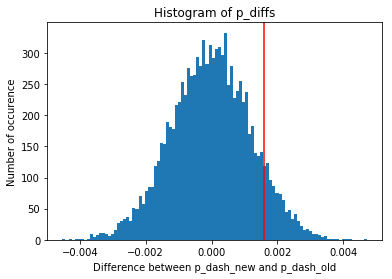

In [29]:
# Results of the sample, actual difference marked red

plt.hist(p_diffs, bins=100)
plt.title("Histogram of p_diffs")
plt.xlabel("Difference between p_dash_new and p_dash_old")
plt.ylabel("Number of occurence")
plt.axvline(obs_diff, color='r')
plt.show()


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [30]:
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()


print( str(round(sum(p_diffs > obs_diff).mean()/len(p_diffs)*100,2))+ ' % of the p_diffs are greater than the actual difference observed in the df2 data.')

90.31 % of the p_diffs are greater than the actual difference observed in the df2 data.


**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**The calculated value is the p-value. It corresponds to the confidence level ouf the test. As long as the p-value is not lower than the Type I error rate (here 0.05), the null hypotheses should be kept.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2[df2['landing_page']=='old_page']['converted'].sum()

# number of conversions with the new_page
convert_new = df2[df2['landing_page']=='new_page']['converted'].sum()

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page']=='old_page'])

# number of individuals who received new_page
n_new = len(df2[df2['landing_page']=='new_page'])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative = 'smaller')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org



In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments

# since H_1 is p{old}<  p{new} we have a left-tailed test, so 'alternative'= 'larger'


z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old],
                                              [n_new,n_old],                                              
                                              alternative= 'larger') 



print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>


> The sm.stats.proportions_ztest() yields a z-score of ca. -1.31 and a p-value of ca. 0.91. The critical value for the 95% confidence interval is 1.96 and the z-score is below that, so we don't reject the bull hypothesis H_0. The p-value of 0.91 is also higher than 0.05, so we don't reject the bull hypothesis based on that either. 
The p-value from the other test was 0.90, so also a failed rejection of the null hypothesis. <br>
So the findings in the parts j. and k. agree.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Since we only have two different outcomes we should be performing a logistic regression.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [33]:
# 1. Create 'intercept' column

df2['intercept'] = 1

In [34]:
# 2. Create 'ab_page' column

df2['ab_page'] = df2['group']=='treatment'
df2['ab_page'] = df2['ab_page'].astype(int)

In [35]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


Nice, everything as it should be

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [36]:
logistic_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
logistic = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [37]:
logistic.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-04 18:42 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>**The p-value associated with 'ab_page' is 0.1899. It is much lower than the p-value of Part II. The reason for that is that the null hypothesis of part II is one-sided and the null hypothesis of part III is two-sided.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**It would be a good idea to consider other factors as well in the analysis if a user converts, since it could be that there is a reason for a user to convert that is not part of the analysis and that would fly under the radar. <br>
On the other hand we need to watch out not to include too many explanatory variables, since a colinearoty between them would influence the results badly.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [38]:
# Read the countries.csv

directory = './countries.csv'

df_countries = pd.read_csv(directory)

In [39]:
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [40]:
# Join with the df2 dataframe

df_merged =  pd.merge(df2, df_countries,  how='inner', left_on=['user_id'], right_on = ['user_id'])

In [41]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [42]:
# Let's see in which countries the pages were visited

df_merged['country'].unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
# Create the necessary dummy variables

In [44]:
df_merged[['CA','UK','US']] = pd.get_dummies(df_merged['country'])

In [45]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [46]:
logistic_model_c = sm.Logit(df_merged['converted'],df_merged[['CA','UK','intercept']])
logistic_c = logistic_model_c.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [47]:
logistic_c.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-04 18:42 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
==================================================================

"""

The p-values are 0.1291 and 0.4558 and thus both greater than 0.05, so we don't have enough evidence to say that conutries affect the conversion.

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [48]:
# Fit your model, and summarize the results
# Let's create the additional columns

df_merged['CA_ab'] = df_merged['CA'] * df_merged['ab_page']
df_merged['UK_ab'] = df_merged['UK'] * df_merged['ab_page']

In [49]:
df_merged.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_ab,UK_ab
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [50]:
# Let's run the regression again

logistic_model_c2 = sm.Logit(df_merged['converted'],
                            df_merged[['CA','UK','CA_ab','UK_ab','intercept']])
logistic_c2 = logistic_model_c2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [51]:
logistic_c2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-04 18:42 AIC:              212782.9259
No. Observations:   290584           BIC:              212835.8241
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
CA           -0.0073    0.0371    -0.1963  0.8444  -0.0799   0.0654
UK            0.0045    0.0175     0.2572  0.7970  -0.0298   0.0389
CA_ab        -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
UK_ab         0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
==================================================================

"""

### Conclusion

>**The p-values for all analysed columns are greater than 0.05, so we can assume that the countries as well as the interaction with countries do not have an impact on the conversion rate. The country as an overall factor does not have impact on the conversion. <br>
With that in mind we can keep the null hypothesis. After considering all the tests performed in the project we can assume that the old page is being more converted into. <br>
Looking forward, maybe one could analyze the time spent on the pages, if this information is available, to investigate if it affects the conversion rate.**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!



In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0